# Taller 3: Exploratory Data Analysis (EDA)

**Dataset:** Forbes Global 2000 (2025)  
**Archivo:** `Forbes_2000_Companies_2025.csv`  
**Generado:** 2025-09-03 00:02:11

Este cuaderno realiza un EDA completo siguiendo los pasos solicitados.


## 1. Entender la necesidad

**Objetivo:** Comprender los factores asociados al tamaño y desempeño financiero de las compañías del ranking Forbes Global 2000 (2025).  
Preguntas guía:
- ¿Cómo se distribuyen las métricas financieras clave?  
- ¿Qué países e industrias concentran más compañías y mayor valor?
- ¿Qué relaciones existen entre variables financieras?
- ¿Qué métricas derivadas ayudan a interpretar el desempeño?


## 2. Descargar y abrir los datos

El archivo CSV ya está disponible localmente. Se carga con **pandas**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# === 2) Carga de datos ===
df_companies = pd.read_csv("Forbes_2000_Companies_2025.csv", sep=';', engine="python", encoding="utf-8")
df_companies.head()


,Rank,Company,Headquarters,Industry,Sales ($B),Profit ($B),Assets ($B),Market Value ($B)
0,1,JPMorganChase,United States,Banking,285.11,59.36,"4,357.86",677.8
1,2,Berkshire Hathaway,United States,Insurance,371.43,89,"1,153.88","1,145.46"
2,3,ICBC,China,Banking,221.96,50.84,"6,688.6",251.33
3,4,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,Oil & Gas Operations,480.15,104.97,645.03,"1,663.38"
4,5,Amazon,United States,Retail and Wholesale,637.96,59.25,624.89,"2,005.64"


## 3. Limpieza de la base de datos

- Estandarizar nombres de columnas a **snake_case**.  
- Remover duplicados.  
- Convertir a numérico columnas con símbolos (`$`, `,`, etc.).  
- Resumen de valores faltantes.


In [3]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2000 non-null   int64  
 1   Company            2000 non-null   object 
 2   Headquarters       2000 non-null   object 
 3   Industry           2000 non-null   object 
 4   Sales ($B)         2000 non-null   float64
 5   Profit ($B)        2000 non-null   object 
 6   Assets ($B)        2000 non-null   object 
 7   Market Value ($B)  2000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [4]:
df = df_companies.copy()

before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Deleted Duplicate Data: {before - after}")



Deleted Duplicate Data: 0


## 4. Transformaciones (10%)

### Parsing Strings to Float24

In [5]:
df_companies.isnull().sum()

Rank                 0
Company              0
Headquarters         0
Industry             0
Sales ($B)           0
Profit ($B)          0
Assets ($B)          0
Market Value ($B)    0
dtype: int64

In [6]:
df_companies[['Profit ($B)','Assets ($B)','Market Value ($B)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Profit ($B)        2000 non-null   object
 1   Assets ($B)        2000 non-null   object
 2   Market Value ($B)  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB


In [7]:
for col in ['Profit ($B)', 'Assets ($B)', 'Market Value ($B)']:
    df_companies[col] = df_companies[col].str.replace(",", "")


In [8]:
df_companies[['Profit ($B)','Assets ($B)','Market Value ($B)']]

,Profit ($B),Assets ($B),Market Value ($B)
0,59.36,4357.86,677.8
1,89,1153.88,1145.46
2,50.84,6688.6,251.33
3,104.97,645.03,1663.38
4,59.25,624.89,2005.64
...,...,...,...
1995,0.3781,3.16,13.84
1996,0.0784,1.99,0.559
1997,0.6288,7.95,3.93
1998,0.0927,42.56,0.679


In [9]:
result_profit = df_companies['Profit ($B)'].str.count('\.') > 1
result_profit.sum()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_28912\1524475582.py:1: SyntaxWarning: invalid escape sequence '\.'
  result_profit = df_companies['Profit ($B)'].str.count('\.') > 1


2

In [10]:
result_assets = df_companies['Assets ($B)'].str.count('\.') > 1
result_assets.sum()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_28912\3800189975.py:1: SyntaxWarning: invalid escape sequence '\.'
  result_assets = df_companies['Assets ($B)'].str.count('\.') > 1


0

In [11]:
result_market = df_companies['Market Value ($B)'].str.count('\.') > 1
result_market.sum()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_28912\77399904.py:1: SyntaxWarning: invalid escape sequence '\.'
  result_market = df_companies['Market Value ($B)'].str.count('\.') > 1


0

In [12]:
mask = df_companies['Profit ($B)'].str.count('\.') > 1
df_companies[mask]


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_28912\2519746371.py:1: SyntaxWarning: invalid escape sequence '\.'
  mask = df_companies['Profit ($B)'].str.count('\.') > 1


,Rank,Company,Headquarters,Industry,Sales ($B),Profit ($B),Assets ($B),Market Value ($B)
878,879,Semiconductor Manufacturing International,China,Semiconductors,7.99,0.513.7,48.42,46.38
1094,1095,Quinenco,Chile,Banking,10.63,0.703.6,66.99,6.91


In [13]:
df_companies.iloc[878,5] = '0.5137'
df_companies.iloc[1094,5] = '0.7036'

In [14]:
mask = df_companies['Profit ($B)'].str.count('\.') > 1
df_companies[mask]

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\seboc\AppData\Local\Temp\ipykernel_28912\206465673.py:1: SyntaxWarning: invalid escape sequence '\.'
  mask = df_companies['Profit ($B)'].str.count('\.') > 1


,Rank,Company,Headquarters,Industry,Sales ($B),Profit ($B),Assets ($B),Market Value ($B)


In [15]:
for col in ['Profit ($B)', 'Assets ($B)', 'Market Value ($B)']:
    df_companies[col] = df_companies[col].astype(float)

In [16]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2000 non-null   int64  
 1   Company            2000 non-null   object 
 2   Headquarters       2000 non-null   object 
 3   Industry           2000 non-null   object 
 4   Sales ($B)         2000 non-null   float64
 5   Profit ($B)        2000 non-null   float64
 6   Assets ($B)        2000 non-null   float64
 7   Market Value ($B)  2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


In [17]:
df_companies.to_csv("Forbes_2000_Companies_2025_Cleaned.csv", sep=';', index=False)

### Cálculo de métricas derivadas:


- `profit_margin = profits / sales`
- `market_to_assets = market_value / assets`
- `asset_turnover = sales / assets`

In [18]:
# === 4) Transformaciones ===

df_companies["profit_margin"] = df_companies['Profit ($B)'] / df_companies['Sales ($B)']
df_companies["market_to_assets"] = df_companies['Market Value ($B)'] / df_companies['Assets ($B)']
df_companies["asset_turnover"] = df_companies['Sales ($B)'] / df_companies['Assets ($B)']

df_companies.head()


,Rank,Company,Headquarters,Industry,Sales ($B),Profit ($B),Assets ($B),Market Value ($B),profit_margin,market_to_assets,asset_turnover
0,1,JPMorganChase,United States,Banking,285.11,59.36,4357.86,677.80,0.208200,0.155535,0.065424
1,2,Berkshire Hathaway,United States,Insurance,371.43,89.00,1153.88,1145.46,0.239614,0.992703,0.321897
2,3,ICBC,China,Banking,221.96,50.84,6688.60,251.33,0.229050,0.037576,0.033185
3,4,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,Oil & Gas Operations,480.15,104.97,645.03,1663.38,0.218619,2.578764,0.744384
4,5,Amazon,United States,Retail and Wholesale,637.96,59.25,624.89,2005.64,0.092874,3.209589,1.020916


In [19]:
df_companies['profit_margin'].isnull().sum()

0

In [20]:
df_companies['profit_margin'].describe()

count    2000.000000
mean             inf
std              NaN
min        -2.526998
25%         0.040627
50%         0.100606
75%         0.184054
max              inf
Name: profit_margin, dtype: float64

In [21]:
s = df_companies['profit_margin']
s.isna().sum(), np.isinf(s).sum(), np.isneginf(s).sum(), np.isposinf(s).sum()

(0, 1, 0, 1)

In [22]:
df_companies['profit_margin'] = (
    df_companies['profit_margin']
      .replace([np.inf, -np.inf], np.nan)   # drop infinities
      .astype(float)
)

In [23]:
df_companies.to_csv("Forbes_2000_Companies_2025_Cleaned_Transformed.csv", sep=';', index=False)

## 5. Exploratorio Inicial (40%)

Incluye:
- Estadísticas descriptivas de variables numéricas.  
- Histogramas (univariado).  
- Conteos por categorías principales (país/industria si existen).  
- Dispersión (bivariado) y matriz de correlación.  


In [24]:
# === 5.1 Descriptivas ===
numeric_cols = [column for column in df_companies.columns if pd.api.types.is_numeric_dtype(df_companies[column])]
print(numeric_cols)
df_companies[numeric_cols].describe().T if numeric_cols else pd.DataFrame()


['Rank', 'Sales ($B)', 'Profit ($B)', 'Assets ($B)', 'Market Value ($B)', 'profit_margin', 'market_to_assets', 'asset_turnover']


,count,mean,std,min,25%,50%,75%,max
Rank,2000.0,1000.331000,577.430053,1.000000,500.750000,1000.500000,1500.250000,1998.000000
Sales ($B),2000.0,26.441630,47.928105,-21.470000,6.147500,12.950000,25.707500,680.990000
Profit ($B),2000.0,2.435273,6.859681,-21.650000,0.520475,1.010000,2.232500,111.000000
Assets ($B),2000.0,121.087279,395.754878,0.181000,15.755000,33.875000,78.820000,6688.600000
Market Value ($B),2000.0,45.641756,154.511821,0.175000,8.307500,17.205000,37.347500,3143.820000
profit_margin,1999.0,0.146416,0.445121,-2.526998,0.040602,0.100497,0.183964,15.290155
market_to_assets,2000.0,1.342402,3.068083,0.000408,0.144147,0.521022,1.394353,73.219814
asset_turnover,2000.0,0.609081,0.696940,-0.482580,0.143554,0.462838,0.803042,12.351449


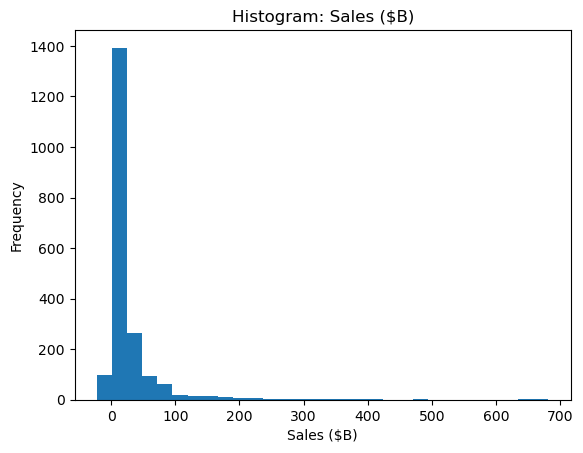

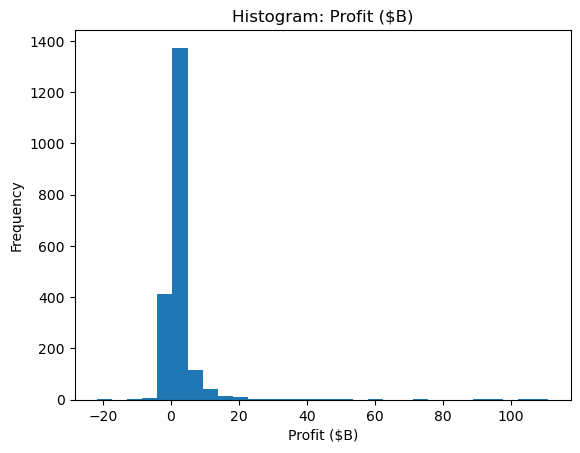

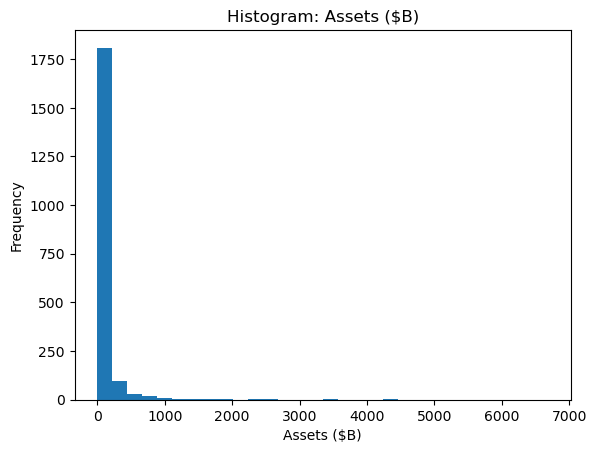

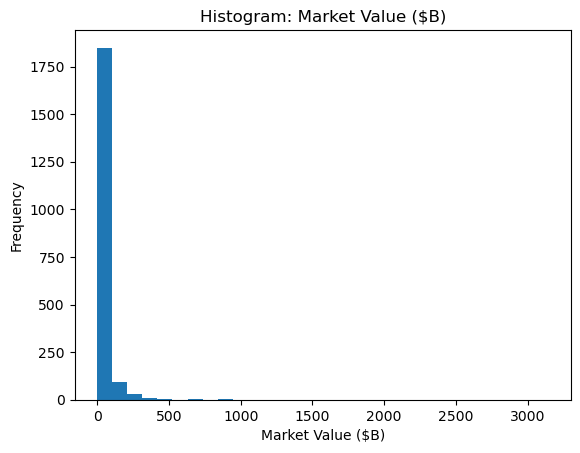

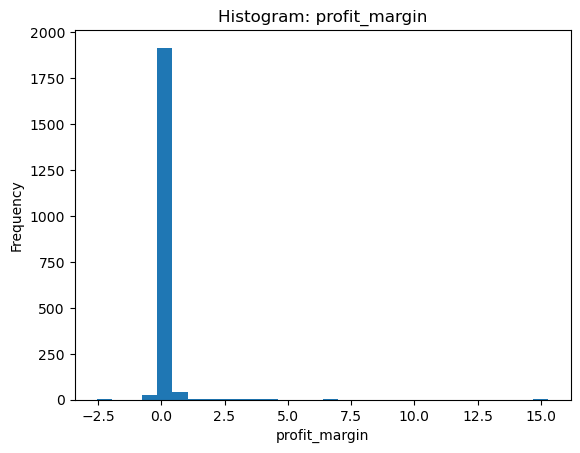

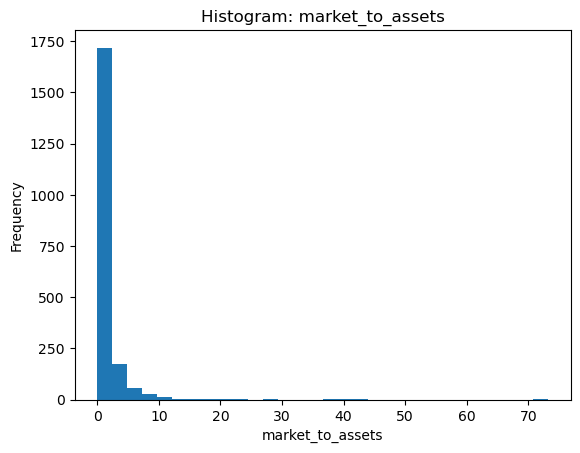

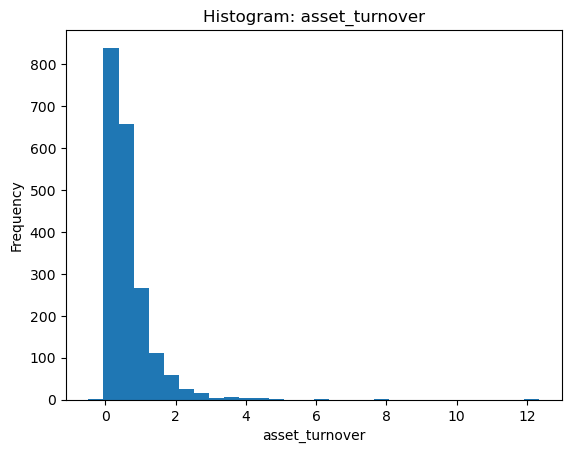

In [25]:
# === 5.2 Univariado: histogramas ===
import matplotlib.pyplot as plt

to_plot = numeric_cols[1:]  # Take all but the first column (Rank Column)
for c in to_plot:
    plt.figure()
    plt.hist(df_companies[c].dropna(), bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("Frequency")
    plt.show()


In [26]:
df_companies.columns

Index(['Rank', 'Company', 'Headquarters', 'Industry', 'Sales ($B)',
       'Profit ($B)', 'Assets ($B)', 'Market Value ($B)', 'profit_margin',
       'market_to_assets', 'asset_turnover'],
      dtype='object')

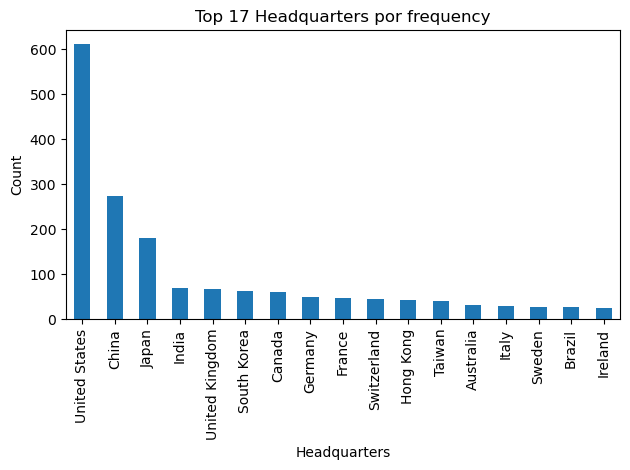

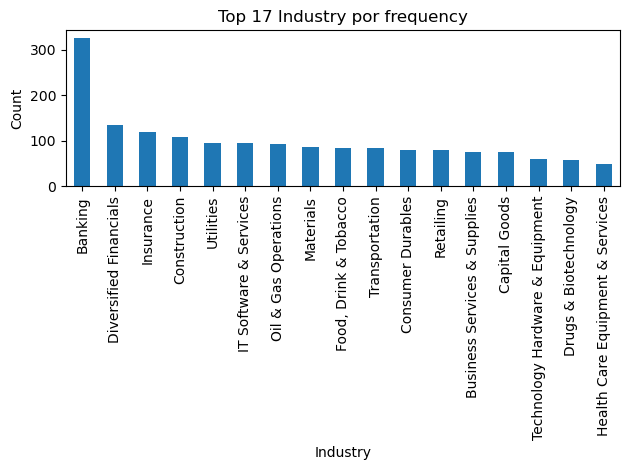

In [27]:
category_columns = [c for c in df_companies.columns if df_companies[c].dtype == object]

for target in ['Headquarters', 'Industry']:
    if target:
        counts = df_companies[target].value_counts().head(17)
        plt.figure()
        counts.plot(kind="bar")
        plt.title(f"Top 17 {target} por frequency")
        plt.xlabel(target); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [30]:
df_companies.columns

Index(['Rank', 'Company', 'Headquarters', 'Industry', 'Sales ($B)',
       'Profit ($B)', 'Assets ($B)', 'Market Value ($B)', 'profit_margin',
       'market_to_assets', 'asset_turnover'],
      dtype='object')

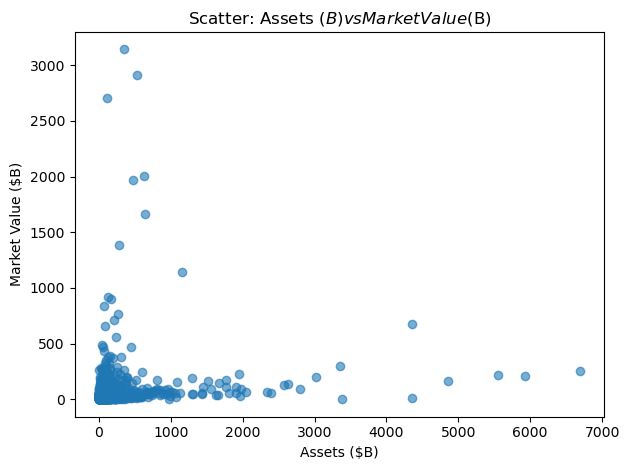

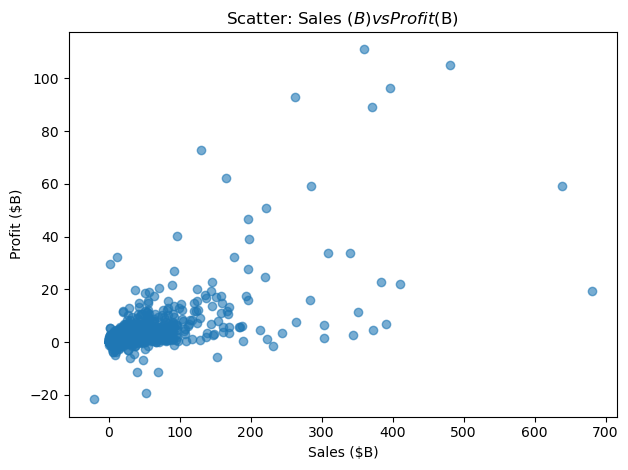

In [31]:
# === 5.3 Bivariado: scatter ===

assets_real = 'Assets ($B)'
market_value = 'Market Value ($B)'
sales_real  = 'Sales ($B)'
profits_real= 'Profit ($B)'

def scatter_if_exists(xc, yc, title):
    if xc and yc and pd.api.types.is_numeric_dtype(df_companies[xc]) and pd.api.types.is_numeric_dtype(df_companies[yc]):
        plt.figure()
        plt.scatter(df_companies[xc], df_companies[yc], alpha=0.6)
        plt.title(title)
        plt.xlabel(xc); plt.ylabel(yc)
        plt.tight_layout()
        plt.show()

scatter_if_exists(assets_real, market_value, f"Scatter: {assets_real} vs {market_value}")
scatter_if_exists(sales_real, profits_real, f"Scatter: {sales_real} vs {profits_real}")


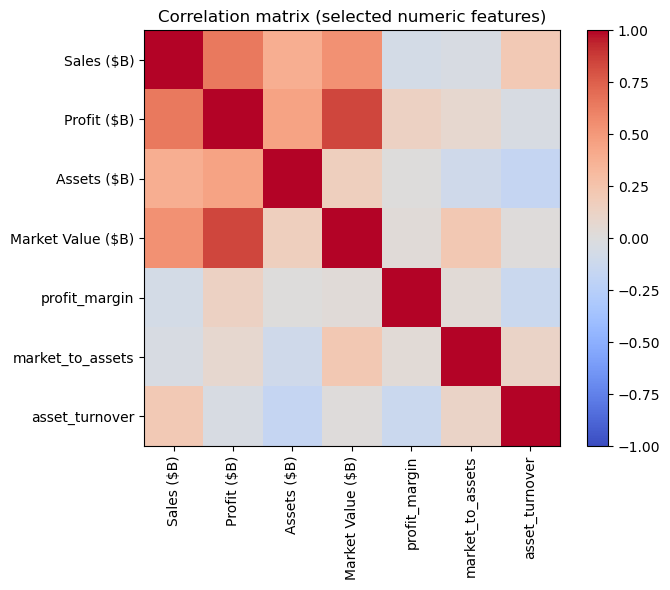

Top absolute correlations:


Market Value ($B)  Profit ($B)          0.839594
Profit ($B)        Sales ($B)           0.646989
Market Value ($B)  Sales ($B)           0.537945
Assets ($B)        Profit ($B)          0.446120
                   Sales ($B)           0.389049
market_to_assets   Market Value ($B)    0.212228
asset_turnover     Sales ($B)           0.205400
                   Assets ($B)          0.171613
Market Value ($B)  Assets ($B)          0.158233
profit_margin      Profit ($B)          0.134098
dtype: float64

In [33]:
# === 5.4 Correlations ===


numeric_cols = [
    'Sales ($B)', 'Profit ($B)', 'Assets ($B)', 'Market Value ($B)',
    'profit_margin', 'market_to_assets', 'asset_turnover'
]


# compute correlation
corr = df_companies[numeric_cols].corr(numeric_only=True) # Pearson correlation coefficient -> which measures the linear relationship between two variables.

# --- heatmap ---
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm', aspect='equal')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation matrix (selected numeric features)")
plt.tight_layout()
plt.show()

# --- top absolute correlation pairs (no duplicates, no diagonal) ---
corr_abs = corr.abs().copy()

# mask lower triangle + diagonal so each pair appears once
mask_lower = np.tril_indices_from(corr_abs, k=0)
corr_abs.values[mask_lower] = np.nan

top_pairs = (
    corr_abs.unstack()
            .dropna()
            .sort_values(ascending=False)
            .head(10)
)

print("Top absolute correlations:")
display(top_pairs)



In [34]:
df_companies.columns

Index(['Rank', 'Company', 'Headquarters', 'Industry', 'Sales ($B)',
       'Profit ($B)', 'Assets ($B)', 'Market Value ($B)', 'profit_margin',
       'market_to_assets', 'asset_turnover'],
      dtype='object')

In [36]:
# === 5.5 Resúmenes por grupo (industry/country) ===

metrics = ['Sales ($B)','Profit ($B)', 'Assets ($B)', 'Market Value ($B)', 'profit_margin','market_to_assets', 'asset_turnover']

display(df_companies.groupby(by='Industry')[metrics].mean(numeric_only=True).sort_values(by=metrics[0], ascending=False).head(15))

display(df_companies.groupby(by='Headquarters')[metrics].mean(numeric_only=True).sort_values(by=metrics[0], ascending=False).head(15))


,Sales ($B),Profit ($B),Assets ($B),Market Value ($B),profit_margin,market_to_assets,asset_turnover
Industry,,,,,,,
Retail and Wholesale,637.960000,59.250000,624.890000,2005.640000,0.092874,3.209589,1.020916
"Engineering, Manufacturing",64.810000,10.790000,87.760000,146.460000,0.166487,1.668870,0.738491
Oil & Gas Operations,56.255376,4.266916,76.472688,57.173011,0.101692,0.595395,0.809339
Consumer Durables,47.369375,2.185425,67.902250,37.295975,0.072379,1.113454,1.035305
Food Markets,45.515000,0.993546,28.590000,20.441154,0.029606,1.320636,1.897748
Retailing,45.473544,1.906118,33.108570,49.470418,0.063230,2.036662,1.504414
Insurance,36.778908,3.285576,219.643277,40.924067,0.095820,0.368974,0.278323
Trading Companies,35.969706,0.966294,27.733235,17.957529,0.036073,0.954587,1.840542
Technology Hardware & Equipment,33.281067,3.281683,37.241017,87.814833,0.091904,2.601690,1.022219


,Sales ($B),Profit ($B),Assets ($B),Market Value ($B),profit_margin,market_to_assets,asset_turnover
Headquarters,,,,,,,
Germany,46.168571,1.935888,147.217347,42.756102,0.066804,0.726070,0.717878
France,42.994681,2.869715,216.126170,57.568936,0.084882,1.049063,0.586982
Spain,33.377368,3.183889,237.505263,42.411579,0.126503,0.777496,0.391828
Saudi Arabia,32.821053,7.147274,106.892105,115.713684,0.238776,1.485363,0.307842
United States,31.857047,3.307264,99.820100,82.062015,0.120826,2.051486,0.716082
United Kingdom,31.395632,2.413741,202.685000,41.936029,0.158379,0.848579,0.601117
China,28.402425,2.380127,208.776280,25.821738,0.115450,1.166358,0.593340
Luxembourg,27.347500,1.139100,36.350000,42.770000,0.063475,2.849961,0.857525
South Korea,27.195645,1.653856,86.555161,13.716210,0.105693,0.281127,0.547413


## 6. Análisis y conclusiones (50%)

- ¿Cómo se distribuyen las métricas financieras clave?  
- ¿Qué países e industrias concentran más compañías y mayor valor?
- ¿Qué relaciones existen entre variables financieras?

### ¿Cómo se distribuyen las métricas financieras clave? 

- All the key financial metrics have a right-skewed (positively skewed) distribution.

### ¿Qué países e industrias concentran más compañías y mayor valor?

- The banking Industry and USA are the ones which have the major number of companies

### ¿Qué relaciones existen entre variables financieras?

- The scatter plot of Assets ($B) vs Market Value ($B) shows that while most companies cluster at lower asset and market value levels, the overall relationship is weak and non-linear. Some firms with massive assets do not have correspondingly high market values, while others achieve very high valuations despite relatively modest asset bases. This suggests that market value is influenced by more than just asset size—factors such as profitability, growth potential, and intangible assets play a critical role in how companies are valued.